# Для выполнения задания выбрал датасет про аудит https://archive.ics.uci.edu/ml/datasets/Audit+Data


In [78]:
## пытаюсь предсказывать поле "Risk"
## Для интереса решил сравнить логистическую регрессию и метод опортных векторов

In [76]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

from sklearn.datasets import make_classification, make_circles
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use("ggplot")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_table("./data/audit_risk.csv",sep = ',')
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
data['Money_Value'] =data['Money_Value'].fillna(0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     776 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [6]:
data.LOCATION_ID.value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
13         35
15         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
27          8
28          8
21          8
43          7
25          6
20          5
30          4
7           4
36          4
38          4
3           3
40          3
35          2
SAFIDON     1
41          1
24          1
LOHARU      1
42          1
NUH         1
23          1
34          1
44          1
33          1
17          1
Name: LOCATION_ID, dtype: int64

In [7]:
data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.119412,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.565468,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.587500,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [8]:
data.Risk.value_counts()

0    471
1    305
Name: Risk, dtype: int64

In [9]:
# удалим константу
data = data.drop(columns = ['Detection_Risk'])

In [10]:
numeric_types = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numeric_types).columns)
object_vars = list(data.select_dtypes(include=["object"]).columns)

In [11]:
data_num = data[numerical_vars].copy()
data_obj = data[object_vars].copy()

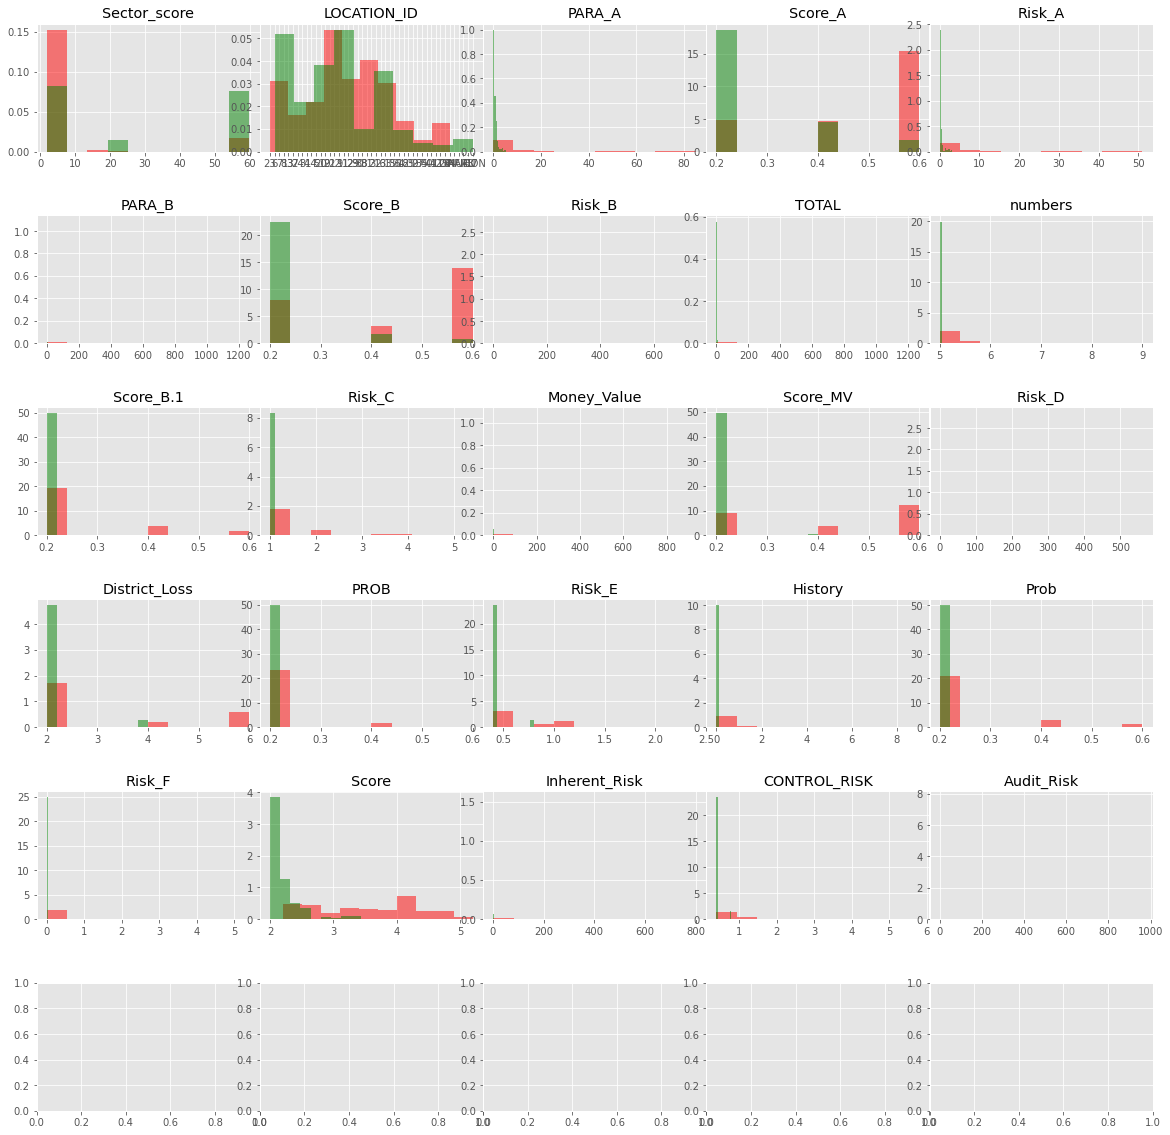

In [80]:
fig, axs = plt.subplots(6,5, figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
df_ = data.drop(columns = ['Risk'])
axs = axs.ravel()

for col,i in zip(df_.columns, range(df_.shape[1])):
    axs[i].hist(data[data.Risk == 1][col] ,color = 'r', alpha = 0.5, density=True)
    axs[i].hist(data[data.Risk == 0][col], color = 'g', alpha = 0.5, density=True)
    axs[i].set_title(col)
# ('Сравнение распределения признаков датасета (зеленый цвет - доброкачественная опухоль, красный - злокачественная)')

In [13]:
data['CONTROL_RISK'].value_counts()

0.4    602
0.8     85
1.2     64
1.6     10
2.4      7
2.2      2
2.0      2
3.4      1
4.8      1
3.6      1
5.8      1
Name: CONTROL_RISK, dtype: int64

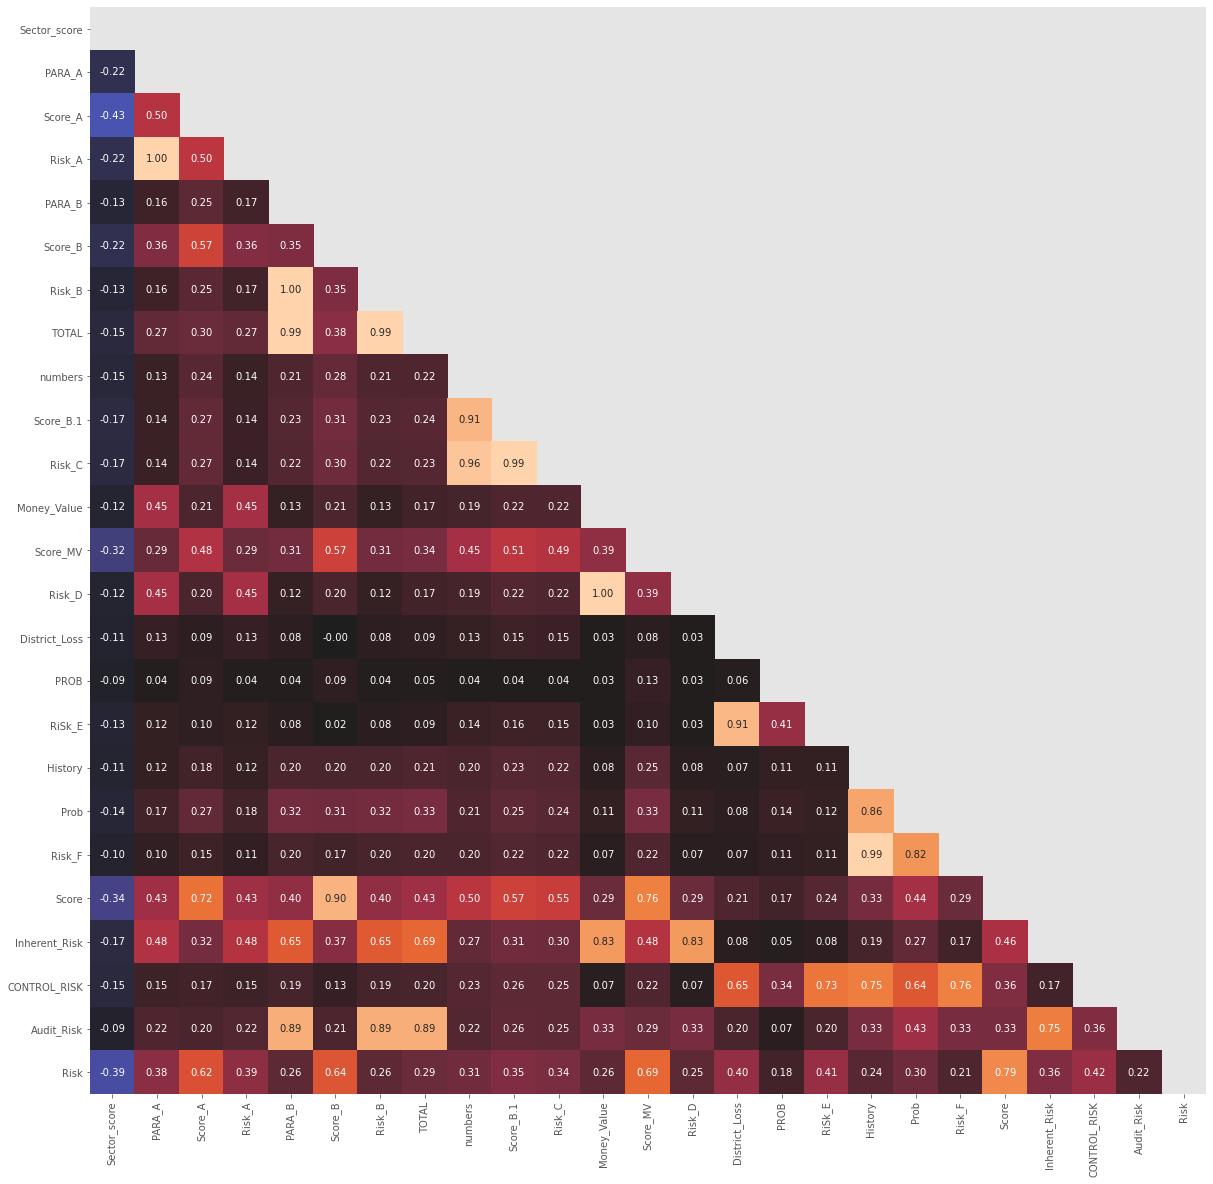

In [14]:
plt.figure(figsize=(20,20))

corr_matrix = data.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

In [15]:
def plot_bar(ind, df):
    total = float(len(df))

    ax = sns.countplot(x=ind, data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format((height/total)*100),
                ha="center") 
    plt.show()

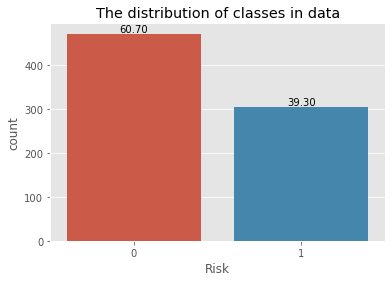

In [16]:
def class_distribution_plot(data):
    plt.title('The distribution of classes in data')
    plot_bar('Risk', data)
#     plt.show()
    
class_distribution_plot(data)

In [17]:
def data_split_train_test(data, target_name, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=[target_name], axis=1),
    data[target_name],
    test_size=test_size,
    stratify=data[target_name],
    random_state=0)

    print("Train_shape:", X_train.shape, "Test shape:", X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [18]:
data_num.shape, data_num.dropna().shape

((776, 25), (776, 25))

In [45]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num,'Risk')

Train_shape: (543, 24) Test shape: (233, 24)


In [49]:
def scale_data(X_train, X_test, scaler_type="minmax"):
    if scaler_type=="minmax":
        scaler = MinMaxScaler()
    elif scaler_type=="std":
        scaler = StandardScaler()
    elif scaler_type=="robust":
        scaler = RobustScaler()
        
    scaler.fit(X_train)
    
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
        
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

## Результ логистической регрессии цифровых признаков

In [69]:
model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

In [71]:
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    
    return quality_list

quality_list_baseline = quality_report(pred, y_test)


=== Quality Report ===
Accuracy: 	 0.966
Precision: 	 0.946
Recall: 	 0.967
f1_score: 	 0.956
ROC-AUC: 	 0.966



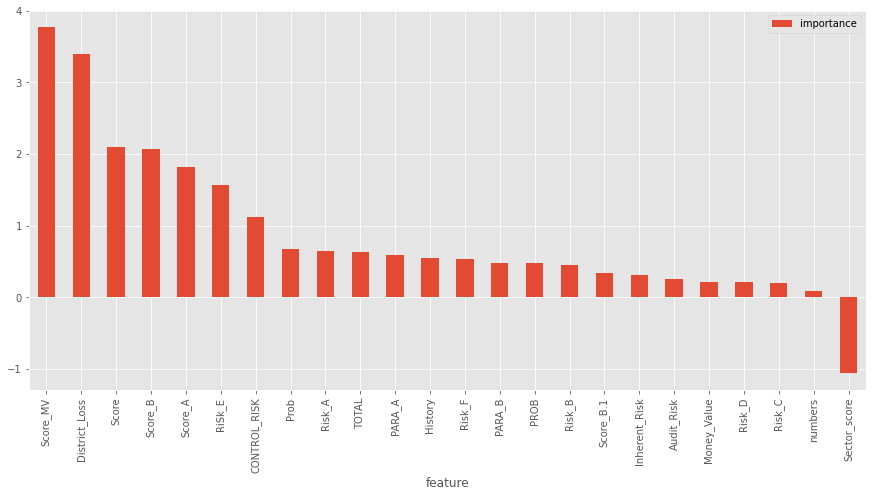

In [26]:
featureImportance = pd.DataFrame({"feature": data_num.drop('Risk',axis=1).columns, 
                                  "importance": model_LogR.coef_[0]})

featureImportance.set_index('feature', inplace=True)

featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance.plot(kind = 'bar', figsize=(15, 7));

## Результ модели SVM цифровых признаков

In [70]:
model_svc = svm.SVC()
model_svc.fit(X_train_scaled, y_train)
pred_svc = model_svc.predict(X_test_scaled)

In [73]:
quality_list_baseline_svc = quality_report(pred_svc, y_test)


=== Quality Report ===
Accuracy: 	 0.961
Precision: 	 0.946
Recall: 	 0.956
f1_score: 	 0.951
ROC-AUC: 	 0.960



## Результ модели логистической регрессии по всем признакам

In [82]:
# разделение на обучающую и тестовую выборки, обработка признаков
X_train, X_test, y_train, y_test = data_split_train_test(data,'Risk')
X_train_1,X_test_1 = scale_data(X_train.drop(columns = ['LOCATION_ID']),X_test.drop(columns = ['LOCATION_ID']))
X_train_2 = pd.get_dummies(X_train['LOCATION_ID'])
# X_test_1 = scale_data(X_test.drop(columns = ['LOCATION_ID']))
X_test_2 = pd.get_dummies(X_test.LOCATION_ID)

X_train_2, X_test_2 = columns_update(X_train_2,X_test_2)

X_train_upd = np.hstack([X_train_1.values,X_train_2.values ])
X_test_upd = np.hstack([X_test_1.values,X_test_2.values ])
cols_ = (X_test_1.columns.values.tolist()) + (X_test_2.columns.values.tolist())


X_train.shape, X_test.shape,X_train_upd.shape,X_test_upd.shape

Train_shape: (543, 25) Test shape: (233, 25)


((543, 25), (233, 25), (543, 69), (233, 69))

In [67]:
model_LogR_2 = LogisticRegression(solver="liblinear")
model_LogR_2.fit(X_train_upd, y_train)
pred1 = model_LogR_2.predict(X_test_upd)

In [68]:
quality_list_baseline_2 = quality_report(pred1, y_test)


=== Quality Report ===
Accuracy: 	 0.966
Precision: 	 0.946
Recall: 	 0.967
f1_score: 	 0.956
ROC-AUC: 	 0.966



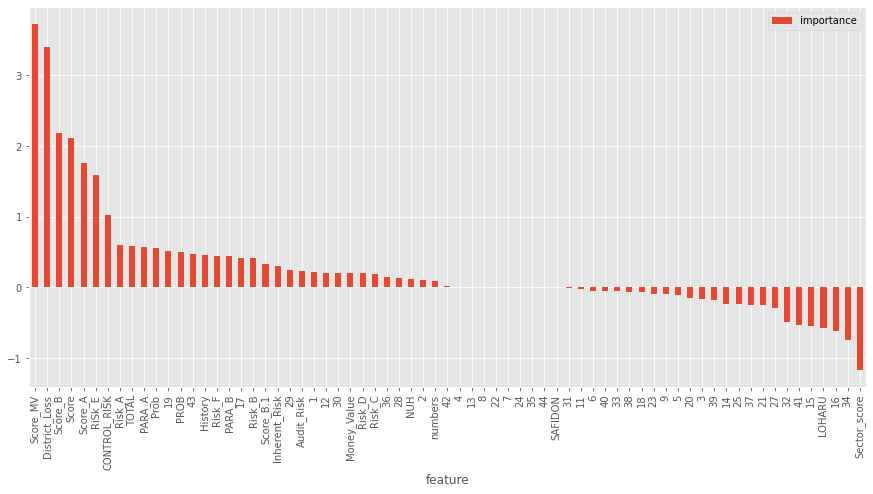

In [65]:
featureImportance_2 = pd.DataFrame({"feature": cols_, 
                                  "importance": model_LogR_2.coef_[0]})

featureImportance_2.set_index('feature', inplace=True)

featureImportance_2.sort_values(["importance"], ascending=False, inplace=True)
featureImportance_2.plot(kind = 'bar', figsize=(15, 7));

In [57]:
# функция для выравнивания кол-во признаков в тестовой и тренировочной выборке
def columns_update(df1, df2):
    cols_x = list(set(df2.columns.values.tolist()) - set(df1.columns.values.tolist()))
    cols_y = list(set(df1.columns.values.tolist()) - set(df2.columns.values.tolist()))
    for col in cols_x:
        df1[col] = 0
    for col in cols_y:
        df2[col] = 0
    return df1,df2

## Результ модели SVM всех признаков

In [83]:
model_svc = svm.SVC()
model_svc.fit(X_train_upd, y_train)
pred_svc_all = model_svc.predict(X_test_upd)

In [85]:
quality_list_baseline_3 = quality_report(pred_svc_all, y_test)


=== Quality Report ===
Accuracy: 	 0.948
Precision: 	 0.924
Recall: 	 0.944
f1_score: 	 0.934
ROC-AUC: 	 0.948



## Выводы

### Линейная регрессии в целом лучше справилась с предсказанием, чем SVM
### Результат только цировых признаков чуть лучше, чем с категориальными